<a href="https://colab.research.google.com/github/adarsh1927/Learning_Deep/blob/main/learning_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# structure
- every lession has its own installations, imports and codes
- structure look like that
```
installations
imports
codes
    (only description) or (description and Tags:)
```


# Lessons

## Creating a Model to detecting the birds

In [ ]:
!pip install -Uqq duckduckgo_search  fastai

In [ ]:
from duckduckgo_search import DDGS
from fastcore.all import *

from fastdownload import download_url
from fastai.vision.all import *

In [ ]:
# Search image from keyword and return a image url
# L is a fastcore.L object which provides a convenient way to manipulate list-like objects

# Fuction return list of urls of images over internet
def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [ ]:
# Lets check what kind of result we get.

# List of url
urls = search_images('bird photos', max_images=1)
# Watch frist item
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

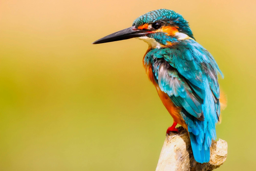

In [ ]:
# Now download image from URL and watch what we get

# A path and name of image
dest = 'bird.jpg'
# Dowload image from its url and save it to destintion
download_url(urls[0], dest, show_progress=False)
# Open this downloaded image
im = Image.open(dest)
# Show in thumbanail
im.to_thumb(256,256)

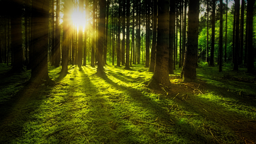

In [ ]:
# Now check it for forest photos

download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [ ]:
# Is it bird or simple forest
# We checking for bird but it is a good idea to check that there are no bird just simple forest
# So there are two categories model will check bird and forest you can include one or more
# Tags: Data Collection, Training Categories, Training Clasess

searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for keyword in searches:
    dest = (path/keyword)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{keyword} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{keyword} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{keyword} shade photo'))
    sleep(10)
    resize_images(path/keyword, max_size=400, dest=path/keyword)

In [ ]:
# Remove corrupted downloaded files.

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

39

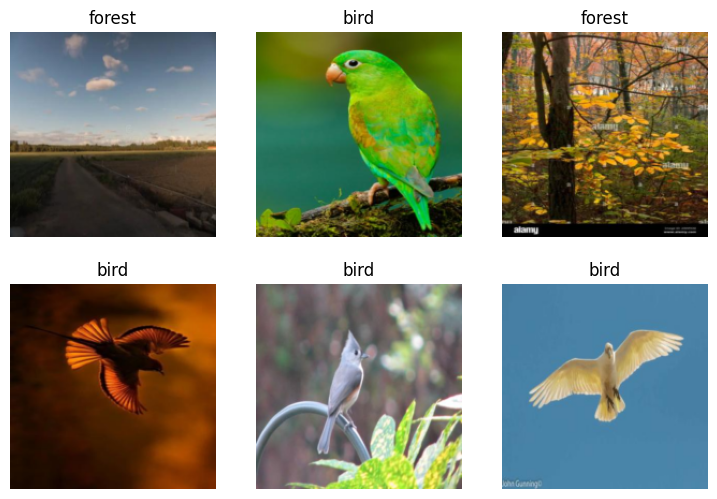

In [ ]:
# Load images data split in training testing, give them labels
# During training, images of birds got their label name from the folder name where they were stored, in this case, "bird"
# Above condition is applicable for forest
# DataBlock is object create the dataset for training easly
# Tags: Dataset, Labels, Folder as Lable/Category, Classification

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
# ResNet18 is a pretrained vision model, and here we are finetuning it to do our work, in this case detecting birds and forests
# Tags: Training, Fine Tuning

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 126MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.868921,0.137610,0.053030,01:43


epoch,train_loss,valid_loss,error_rate,time
0,0.148182,0.074469,0.030303,02:08
1,0.080866,0.040027,0.015152,01:58
2,0.058540,0.044123,0.022727,01:59


In [ ]:
# previously we dowloded an image for checking and save it from name bird.jpg now we use it for testing our trained model

is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


#### Questions you should ask
---
---
- **Can you explain this whole traingin process in easy language?**  
▶  
I am creating a vision model which is able to detect 'is it a bird or forest'.  
Collecting images from internet with the help of 'Duck Duck Go'.  
Data for training is stored in a formate like that :-  
```
bird_or_not (name of Dataset)
    |---- bird (a label)
    |-------- Images (images as data) (containing birds)
    |---- forest (another label)
    |-------- Images (also images as data) (containing forest)

```

